In [37]:
# Importing libraries and Tools

In [38]:
import os
import numpy as np
import random # generates random values for data augmentation step
from PIL import Image, ImageEnhance

#keras
#For building model
from tensorflow.keras.models import Sequential

#For model layers
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

# For loading images
from tensorflow.keras.preprocessing.image import load_img

#For optimizer
from tensorflow.keras.optimizers import Adam

# We are using VGG16
from tensorflow.keras.applications import VGG16

#For shuffling the data
from sklearn.utils import shuffle

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Directories for training and testing data
train_dir = '/content/drive/MyDrive/MRI Images/Testing'
test_dir = '/content/drive/MyDrive/MRI Images/Training'

In [41]:
# load and shuffle the train data
train_paths = []
train_labels=[]

for label in os.listdir(train_dir):
  #print(label)
  for image in os.listdir(os.path.join(train_dir, label)):
    train_paths.append(os.path.join(train_dir, label, image))
    train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [42]:
train_paths

['/content/drive/MyDrive/MRI Images/Testing/glioma/Te-gl_0056.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/pituitary/Te-pi_0138.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/pituitary/Te-pi_0177.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/pituitary/Te-pi_0223.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/meningioma/Te-me_0234.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/meningioma/Te-me_0132.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/pituitary/Te-pi_0206.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/pituitary/Te-pi_0236.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/meningioma/Te-me_0038.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/glioma/Te-gl_0191.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/notumor/Te-no_0355.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/glioma/Te-gl_0252.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/glioma/Te-gl_0163.jpg',
 '/content/drive/MyDrive/MRI Images/Testing/notumor/Te-no_0346.jpg',
 '/content/drive/My

In [43]:
# load and shuffle the test data
test_paths = []
test_labels=[]

for label in os.listdir(test_dir):
  #print(label)
  for image in os.listdir(os.path.join(test_dir, label)):
    test_paths.append(os.path.join(test_dir, label, image))
    test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

In [44]:
test_paths

['/content/drive/MyDrive/MRI Images/Training/notumor/Tr-no_0894.jpg',
 '/content/drive/MyDrive/MRI Images/Training/glioma/Tr-gl_0919.jpg',
 '/content/drive/MyDrive/MRI Images/Training/meningioma/Tr-me_1216.jpg',
 '/content/drive/MyDrive/MRI Images/Training/glioma/Tr-gl_1021.jpg',
 '/content/drive/MyDrive/MRI Images/Training/notumor/Tr-no_0203.jpg',
 '/content/drive/MyDrive/MRI Images/Training/glioma/Tr-gl_0132.jpg',
 '/content/drive/MyDrive/MRI Images/Training/glioma/Tr-gl_0748.jpg',
 '/content/drive/MyDrive/MRI Images/Training/pituitary/Tr-pi_0915.jpg',
 '/content/drive/MyDrive/MRI Images/Training/glioma/Tr-gl_1067.jpg',
 '/content/drive/MyDrive/MRI Images/Training/notumor/Tr-no_0073.jpg',
 '/content/drive/MyDrive/MRI Images/Training/glioma/Tr-gl_0966.jpg',
 '/content/drive/MyDrive/MRI Images/Training/pituitary/Tr-pi_1414.jpg',
 '/content/drive/MyDrive/MRI Images/Training/meningioma/Tr-me_0251.jpg',
 '/content/drive/MyDrive/MRI Images/Training/meningioma/Tr-me_0398.jpg',
 '/content/dr

Data Visualization

In [45]:
import random
import matplotlib.pyplot as plt

# We are selecting 10 random index
random_indices = random.sample(range(len(train_paths)), 10)
random_indices

[34, 30, 458, 1045, 853, 1094, 796, 338, 358, 879]

0 34
1 30
2 458
3 1045
4 853
5 1094
6 796
7 338
8 358
9 879


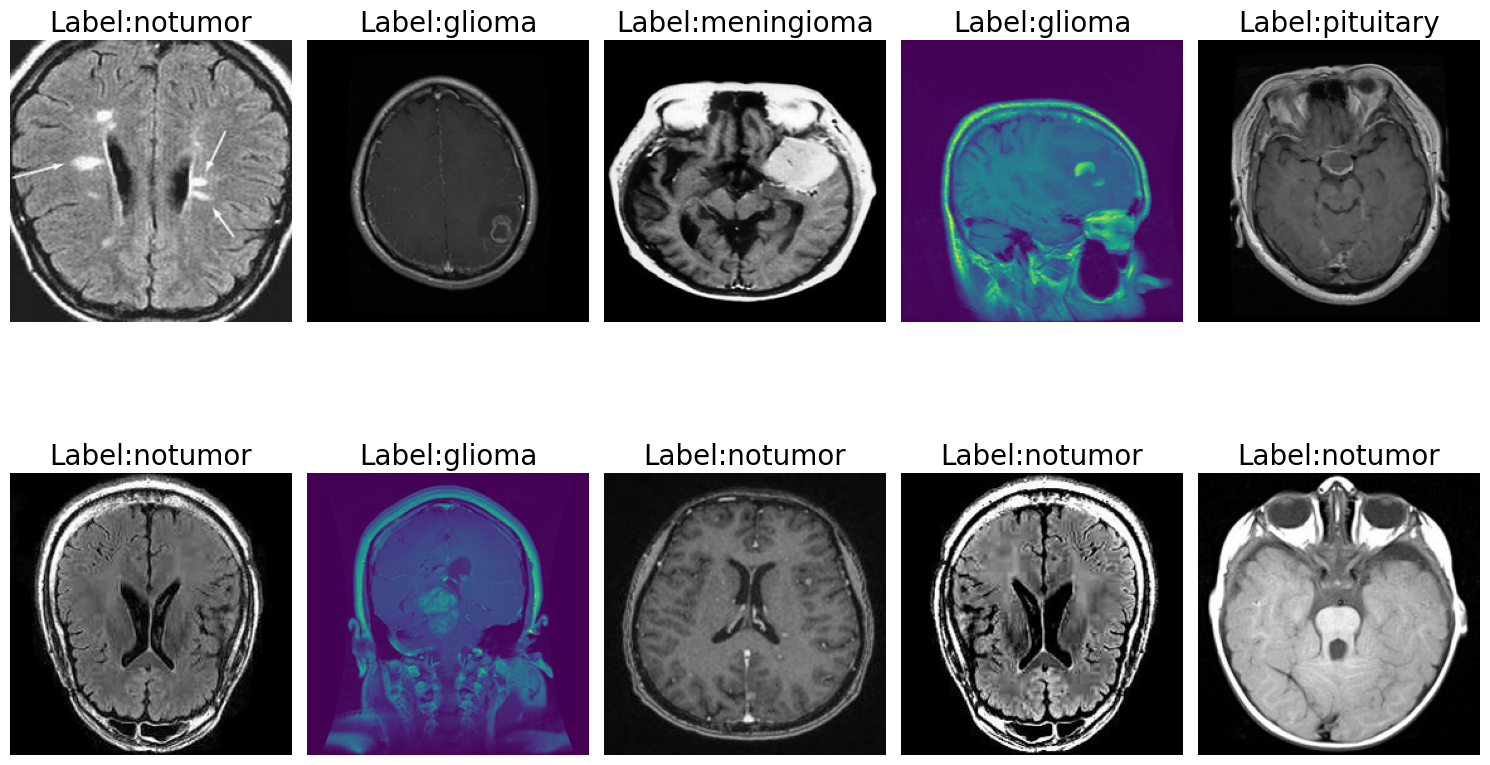

In [46]:
# create a figure to display images in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes=axes.flatten()

# Loop through the random indicies and display images
for i, index in enumerate(random_indices):
  print(i, index)

  #reading the images
  img_path = train_paths[index]
  img = Image.open(img_path)
  img = img.resize((224, 224))

  #Display images
  axes[i].imshow(img)

  # To remove 'x'
  axes[i].axis('off')
  axes[i].set_title(f"Label:{train_labels[index]}", fontsize=20)

plt.tight_layout()
plt.show()


Image Preprocessing (Helper Functions)

Image preprocessing is the step of preparing raw images before feeding them into a model. It involves operations like resizing, normalization, noise removal, and augmentation. This step is important because it improves image quality, ensures consistency, and helps the model learn better features for accurate predictions.

Image augmentation means creating new, slightly changed versions of existing images — like rotating, flipping, or adjusting brightness. It helps the model see more variations and learn better, improving its accuracy and reducing overfitting.

In [47]:
os.listdir(train_dir)
len(os.listdir(train_dir))

4

In [48]:
# -----------------------------
# Helper Functions
# -----------------------------
import os, random
import numpy as np
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import load_img
from sklearn.utils import shuffle

# Image augmentation
def augment_image(image):
    if isinstance(image, Image.Image):
        image = np.array(image)  # convert PIL to array first
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

# Load images
def open_images(paths, IMAGE_SIZE):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = augment_image(img)
        images.append(img)
    return np.array(images)

def open_images_test(paths, IMAGE_SIZE):
    """Load test images without augmentation"""
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = np.array(img) / 255.0  # Only normalize, NO augmentation
        images.append(img)
    return np.array(images)

# Encode labels
def encode_labels(labels, train_dir):
    unique_labels = sorted(os.listdir(train_dir))  # ← ADD sorted()
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)

# Data generator
def data_generator(paths, labels, train_dir, batch_size=12, IMAGE_SIZE=128):
    while True:  # ← CHANGE TO while True
        paths, labels = shuffle(paths, labels)
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]
            batch_images = open_images(batch_paths, IMAGE_SIZE)
            batch_labels = encode_labels(batch_labels, train_dir)
            yield batch_images, batch_labels

# -----------------------------
# Model Architecture
# -----------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

IMAGE_SIZE = 128
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

# Fine-tune last few layers
for layer in base_model.layers[-4:-1]:
    layer.trainable = True

# Build model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# -----------------------------
# Training Parameters
# -----------------------------
batch_size = 20
steps = int(len(train_paths) / batch_size)
epochs = 5

# -----------------------------
# Train model
# -----------------------------
history = model.fit(
    data_generator(train_paths, train_labels, train_dir, batch_size=batch_size, IMAGE_SIZE=IMAGE_SIZE),  # ← REMOVE epochs parameter
    steps_per_epoch=steps,
    epochs=epochs

)


Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 1.0125 - sparse_categorical_accuracy: 0.5848
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.4425 - sparse_categorical_accuracy: 0.8130
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.3453 - sparse_categorical_accuracy: 0.8648
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.3096 - sparse_categorical_accuracy: 0.8822
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.1984 - sparse_categorical_accuracy: 0.9210


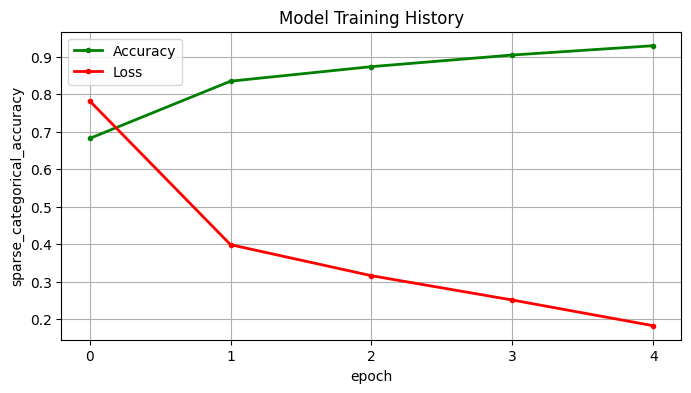

In [49]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title("Model Training History")
plt.xlabel('epoch')
plt.ylabel('sparse_categorical_accuracy')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'])
plt.show()

Model Classification Report by using Confusion Matrix

In [50]:
"""from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

test_images = open_images(test_paths, IMAGE_SIZE)
test_labels_encoded = encode_labels(test_labels)

test_predictions = model.predict(test_images)

print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))"""



'from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.preprocessing import label_binarize\nimport numpy as np\n\ntest_images = open_images(test_paths, IMAGE_SIZE)\ntest_labels_encoded = encode_labels(test_labels)\n\ntest_predictions = model.predict(test_images)\n\nprint("Classification Report:")\nprint(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))'

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# -----------------------------
# Helper to load test images without augmentation
# -----------------------------
def open_images_test(paths, IMAGE_SIZE):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = np.array(img) / 255.0  # normalize only
        images.append(img)
    return np.array(images)

# -----------------------------
# Test data generator
# -----------------------------
def test_data_generator(paths, labels, batch_size=20, IMAGE_SIZE=128):
    for i in range(0, len(paths), batch_size):
        batch_paths = paths[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]
        batch_images = open_images_test(batch_paths, IMAGE_SIZE)
        batch_labels_encoded = encode_labels(batch_labels, train_dir)
        yield batch_images, batch_labels_encoded

# -----------------------------
# Predict in batches
# -----------------------------
all_preds = []
all_labels = []

batch_size = 64
for X_batch, y_batch in test_data_generator(test_paths, test_labels, batch_size, IMAGE_SIZE):
    preds = model.predict(X_batch)
    all_preds.append(preds)
    all_labels.append(y_batch)

# Combine all batches
all_preds = np.vstack(all_preds)
all_labels = np.hstack(all_labels)

# -----------------------------
# Evaluation
# -----------------------------
y_pred = np.argmax(all_preds, axis=1)

print("Classification Report:")
print(classification_report(all_labels, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(all_labels, y_pred)
print(cm)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━

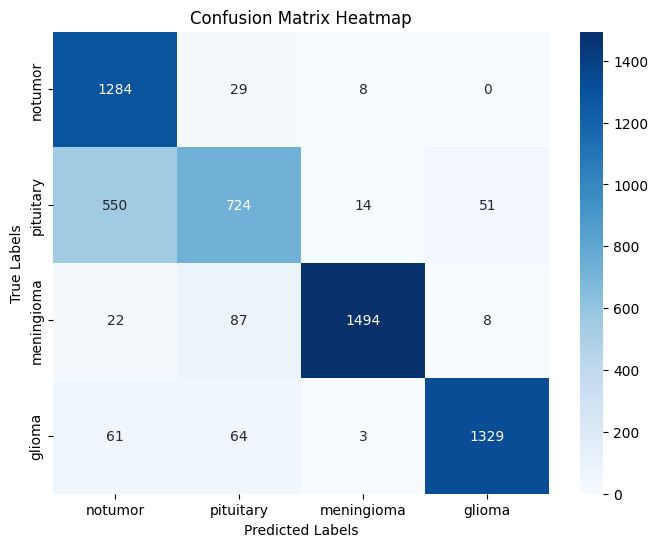

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,        # show numbers
            fmt="d",           # integer format
            cmap="Blues",      # color map
            xticklabels=os.listdir(train_dir),
            yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


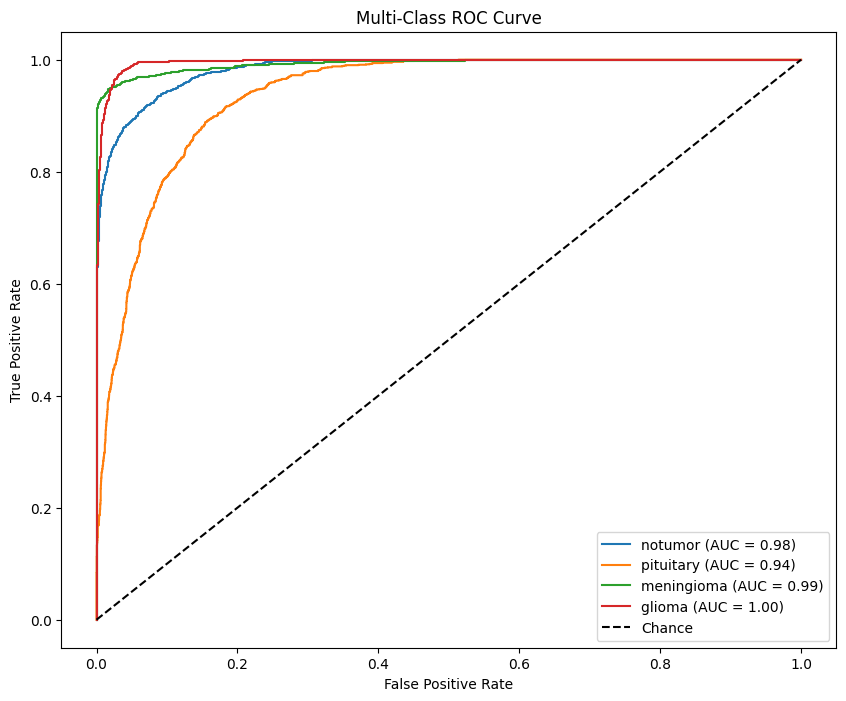

In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import os

# -----------------------------
# Step 1: Binarize labels for multi-class ROC
# -----------------------------
num_classes = len(os.listdir(train_dir))
all_labels_bin = label_binarize(all_labels, classes=np.arange(num_classes))

# -----------------------------
# Step 2: Compute ROC curve and AUC for each class
# -----------------------------
fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# -----------------------------
# Step 3: Plot ROC curves
# -----------------------------
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(os.listdir(train_dir)):
    plt.plot(fpr[i], tpr[i], label=f"{class_name} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Saving and loading the model

In [54]:
# Save the entire model
model.save('model.h5')

In [55]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model.h5')


MRI Tumor Detection System

In [69]:
from keras.preprocessing.image import load_img, img_to_array
class_labels = ['pituitary_tumor', 'glioma_tumor', 'no_tumor', 'meningioma_tumor']
import numpy as np
def detect_and_display(image_path, model):
    # Get class names in SAME ORDER as training
    class_names = sorted(os.listdir(train_dir))  # ← MUST be sorted!

    # Load image (same as test preprocessing)
    img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = np.array(img) / 255.0  # Only normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]

    predicted_label = class_names[predicted_class]

    print(f"Tumor Detected: {predicted_label} (Confidence: {confidence:.2f})")

    # Display the image
    plt.figure(figsize=(8, 3))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}", fontsize=14)
    plt.axis('off')
    plt.show()

    return predicted_label, confidence

EXAMPLE

Tumor Detected: meningioma (Confidence: 0.99)


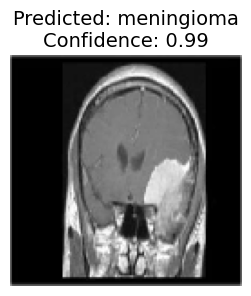

('meningioma', np.float32(0.99209046))

In [70]:
image_path = '/content/drive/MyDrive/MRI Images/Testing/meningioma/Te-meTr_0000.jpg'
detect_and_display(image_path, model)

Tumor Detected: pituitary (Confidence: 1.00)


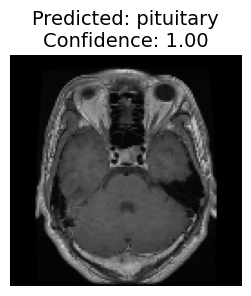

('pituitary', np.float32(0.998252))

In [71]:
image_path='/content/drive/MyDrive/MRI Images/Testing/pituitary/Te-piTr_0000.jpg'
detect_and_display(image_path, model)


Tumor Detected: notumor (Confidence: 1.00)


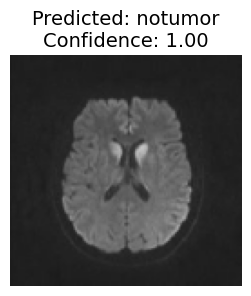

('notumor', np.float32(0.9994824))

In [72]:
image_path='/content/drive/MyDrive/MRI Images/Testing/notumor/Te-noTr_0007.jpg'
detect_and_display(image_path, model)


Tumor Detected: glioma (Confidence: 1.00)


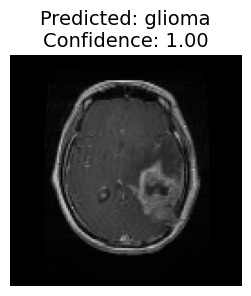

('glioma', np.float32(0.9992219))

In [73]:
image_path='/content/drive/MyDrive/MRI Images/Testing/glioma/Te-gl_0022.jpg'
detect_and_display(image_path, model)